# 5 - Plot Figures 11, 12, and 13
# Optimising Sub-pattern Recognition: Robustness to Noise

This notebook plots figure 11 from *Section 9.1: Optimising Sub-pattern Recognition* and figures 12 and 13 from *Section 9.2: Explaining the Sub-pattern Optimisations*.

By default, this notebook uses previously generated data stored in the `examples\experiment_results\experiment_B_sub_pattern` folder. Pre-generated figures are also available in the `figures` directory.

If you would like to generate fresh data to be plotted:
* Use the notebook `4 - Experiment_B_sub_pattern - Run.ipynb` to re-generated the data. You can change the parameters to adjust the experiment.
* This notebook reads from the ``paper_data`` sheets in the Excel files in the `examples\experiment_results` folder. Re-generated data will be written to the ``latest_data`` sheet, so that the paper data is not overwritten. Uncomment the line in the appropriate cell in this notebook to read from the ``latest_data`` sheet to pick up the updated results.

To examine the effect of the sub-pattern recognition optimisations on ESAM network noise robustness, the following experiment was used:

<table>
<tr><td>

| Problem B    |          |
| :----------- | :------  | 
| $f$          | 2,000      | 
| $m$          | 1,000 | 
| $s_m$        | 0.1     | 
| $s_n$        | Varying      | 
</td><td>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
</td><td>

| Network B (Baseline) |          |
| :--------------------| :------  | 
| $h$                  | 2        | 
| $\theta$             | 12       | 
| $s^+_{f\_h}$         | 0.1      | 
| $\sigma_{h\_pre+}$   | `FixedProbability` | 
| $s^+_{h\_f}$         | 1     | 
| $s^-_{h\_f}$         | 0 (no inhibition)     | 
| $\sigma_{f\_pre+}$, $\sigma_{f\_pre-}$  |  `FixedProbability`       | 
| $e$                  | 3        | 

</td></tr> </table>

The accuracy of four different networks are compared in the graphs as the number of memories $m$ varies:

* Network B - the baseline network (as described above).
* Network B with $\theta$ optimised for each test as described in section 6.2.
* Network B with sub-pattern recognition (feature to hidden) connections optimised as described in section 6.3.
* Network B with $\theta$ and the connections optimised.

Results from the initial paper [1] are also plotted in Figure 11. This is to validate that they are the same as the baseline from Network B.


[1] Hoffmann, H. (2019). Sparse Associative Memory. *Neural Computation*

## Initialisation and specification of the tests to plot

Pre-liminary set-up code to import the dependencies and specify the tests to be included.

### Dependencies

In [1]:
import sys
sys.path.append('../src')
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from simulation_scripts.test_suite_reader import TestSuiteReader
from simulation_scripts.utils.excel_handler import ExcelHandler, get_timestamp_str
plt.tight_layout()
sns.set_theme(style="whitegrid")

<Figure size 640x480 with 0 Axes>

### Set up the test suite details

Specify where the plot data will be aquired from.

In [2]:
# The directory containing the test data
data_base_dir = 'experiment_results'
test_group_name = 'experiment_B_sub_pattern'
base_dir = data_base_dir+os.sep+test_group_name

# The tests dictionary is a mapping between the excel files that contain the data and 
# the names that will appear in the plots.
tests = {'original': 'Network B (baseline)',
         'opt_thresh': 'Network B with threshold optimized',
         'opt_conns': 'Network B with connections optimized',
         'opt_thresh_conns': 'Network B with threshold and connections optimized'}

# The name of the data sheet in each of the excel files that contains the relevant data.
data_sheet = 'paper_data'
# If the test suites are re-run, the latest data will always be stored in 'latest_data'. Uncomment the following
# line to pick up this data.
#data_sheet = 'latest_data'

# test_suite_type defines whether aspects of the problem space or the network are varied 
# for each test. This is necessary for generating the theoretical data. 
test_suite_type='vary_problem'

## Figure 11: The Effect of Sub-pattern Recognition Optimisations on Robustness to Noise

Generate a single plot to compare the accuracies across the various networks with varying noise in the data.
Plot accuracies on the same plot.

### Add the Hoffmann data

For this plot, we also need the Hoffmann paper data (in order to validate that it matches
the generated baseline network data). Don't include this data if the experiment has been re-run (only plot for the paper generated data).

In [3]:
if data_sheet == 'paper_data':
    tests_plus_hoffmann = tests.copy()
    tests_plus_hoffmann['hoffmann_paper']='Network B (baseline results from Hoffmann paper)'
    empirical_tests = tests_plus_hoffmann
else:
    empirical_tests = tests

### Read in the data

In [4]:
test_reader = TestSuiteReader(test_dir=base_dir,
                              test_suite_type=test_suite_type,
                              tests = empirical_tests,
                              test_data_sheet=data_sheet)
all_tests = test_reader.get_tests_data()

# Filter on the final epoch - acquired from the static description of one of the tests
reader = ExcelHandler(base_dir, 'original')
network_static = reader.read_sheet(sheet_name='network_params_static').iloc[0]
plot_data = all_tests.copy().loc[all_tests['epoch'] == network_static['e']]

tests are :  ['original', 'opt_thresh', 'opt_conns', 'opt_thresh_conns', 'hoffmann_paper']
test dir:  experiment_results/experiment_B_sub_pattern
Using the following pre-generated data:

  File                                                            Data Sheet
  ---------------------------------------------------------------------------
  experiment_results/experiment_B_sub_pattern/original.xlsx       paper_data
  experiment_results/experiment_B_sub_pattern/opt_thresh.xlsx     paper_data
  experiment_results/experiment_B_sub_pattern/opt_conns.xlsx      paper_data
  experiment_results/experiment_B_sub_pattern/opt_thresh_conns.xlsx    paper_data
  experiment_results/experiment_B_sub_pattern/hoffmann_paper.xlsx    paper_data

TestSuiteResults successfully initialised for tests ['original', 'opt_thresh', 'opt_conns', 'opt_thresh_conns', 'hoffmann_paper']


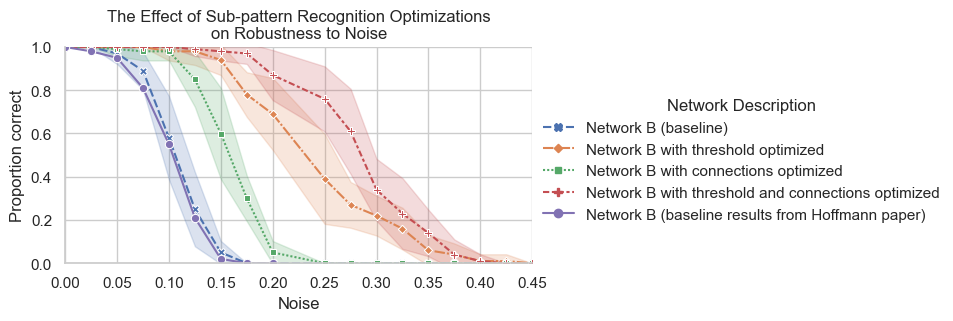

In [5]:
line_key_name = 'Network Description'
plot_data[line_key_name] = plot_data['test'].astype('category')

x_col = 'data_param_s_n'
y_col = 'prop_correct'
hue_order = []
for _, test_name in empirical_tests.items():
    hue_order.append(test_name)

sns.relplot(data=plot_data,
            x=x_col,
            y=y_col,
            style=line_key_name,
            kind='line',
            markers=True,
            height=3,
            aspect=2.0,
            hue=line_key_name,
            hue_order=hue_order,
            errorbar='sd',
            )

plt.xlim(plot_data[x_col].min(), plot_data[x_col].max())
plt.ylim(0, 1)
plt.xlabel('Noise')
plt.ylabel('Proportion correct')
plt.title('The Effect of Sub-pattern Recognition Optimizations\non Robustness to Noise')

# Uncomment the following two lines to save the figure in a timestamped file in the figures dir.
# (The timestamp is added to avoid accidental overwrite)
#tstamp = get_timestamp_str()
#plt.savefig('..'+os.sep+'figures'+os.sep+'figure11_'+tstamp+'.png', dpi=1000, bbox_inches='tight')

plt.show()

## Figure 12: Validation against theoretical calculations

The theoretical accuracies have been previously calculated and are in the `theory` sheet of each test excel file.
If the sheet doesn't exist, the `TheoreticalResults` object will create them and save to the relevant file.


In [6]:
# Re-read in the tests, this time without the Hoffmann original data
theoretical = TestSuiteReader(test_dir=base_dir, 
                              test_suite_type=test_suite_type,
                              tests = tests,
                              test_data_sheet=data_sheet)
all_tests_plot_data = theoretical.get_theory_empirical_probs()

tests are :  ['original', 'opt_thresh', 'opt_conns', 'opt_thresh_conns']
test dir:  experiment_results/experiment_B_sub_pattern
Using the following pre-generated data:

  File                                                            Data Sheet
  ---------------------------------------------------------------------------
  experiment_results/experiment_B_sub_pattern/original.xlsx       paper_data
  experiment_results/experiment_B_sub_pattern/opt_thresh.xlsx     paper_data
  experiment_results/experiment_B_sub_pattern/opt_conns.xlsx      paper_data
  experiment_results/experiment_B_sub_pattern/opt_thresh_conns.xlsx    paper_data

TestSuiteResults successfully initialised for tests ['original', 'opt_thresh', 'opt_conns', 'opt_thresh_conns']
Reading theoretical probabilities for test original from file.
Reading theoretical probabilities for test opt_thresh from file.
Reading theoretical probabilities for test opt_conns from file.
Reading theoretical probabilities for test opt_thresh_conn

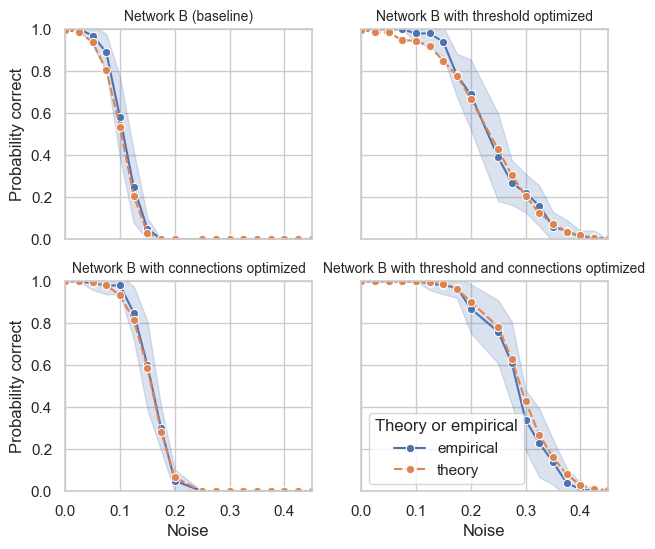

In [7]:
fig, _ = plt.subplots(2,2, figsize = (7, 6))

y_min=0
y_max=1

for plot_num, test_df in zip(range(len(all_tests_plot_data)), all_tests_plot_data):
    name_of_test = test_df['test_name'].iloc[0]

    ax = plt.subplot(2,2,plot_num+1)
    
    legend=False
    if plot_num == 3:
        legend = True
    
    df_empirical = test_df.loc[test_df['Theory or empirical']=='empirical']
    x_min=df_empirical['data_param_s_n'].min()
    x_max=df_empirical['data_param_s_n'].max()
    sns.lineplot(data=test_df,
                 x=x_col,
                 y='prob_correct',
                 style='Theory or empirical',
                 marker='o',
                 hue='Theory or empirical',
                 errorbar='sd',
                 ax=ax,
                 legend=legend
                 )

    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    ax.set_title(name_of_test, fontsize=10)
    
    # Print the x axis for plots 2 and 3
    if plot_num >= 2:
        ax.set_xlabel('Noise')
    else:
        ax.get_xaxis().set_ticklabels([])
        ax.set_xlabel(None)
    # Print the y axis for plots 0 and 2
    if (plot_num==0) or (plot_num == 2):
        ax.set_ylabel('Probability correct')
    else:
        ax.get_yaxis().set_ticklabels([])
        ax.set_ylabel(None)
            
# Uncomment the following two lines to save the figure in a timestamped file in the figures dir.
# (The timestamp is added to avoid accidental overwrite)
#tstamp = get_timestamp_str()
#plt.savefig('..'+os.sep+'figures'+os.sep+'figure12_'+tstamp+'.png', dpi=1000, bbox_inches='tight')

plt.show()

## Figure 13: Understanding the Results

Exploring the hidden neuron firing activity for the tests.

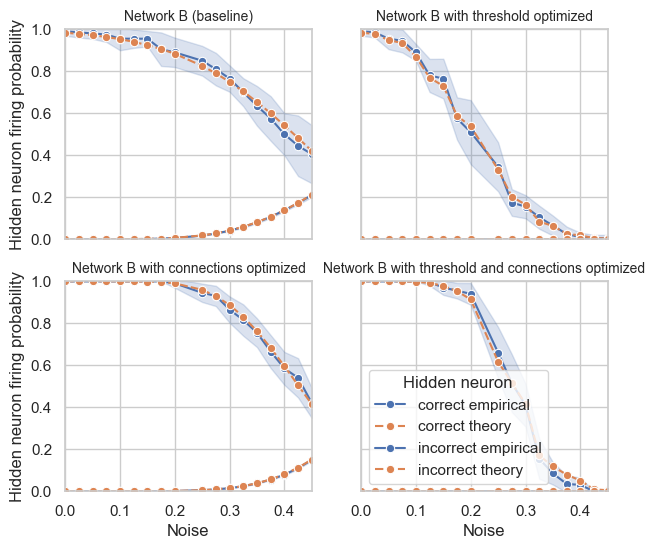

In [8]:
fig, _ = plt.subplots(2,2, figsize = (7, 6))

y_min=0
y_max=1

for plot_num, test_df in zip(range(len(all_tests_plot_data)), all_tests_plot_data):
    name_of_test = test_df['test_name'].iloc[0]
   
    # Add an additional column: 'hidden neuron'
    test_df_correct = test_df.copy()
    test_label = np.array(test_df_correct['Theory or empirical'])
    test_label = 'correct ' + test_label
    test_df_correct['Hidden neuron']=test_label
    
    test_df_incorrect = test_df.copy()
    test_label = np.array(test_df_incorrect['Theory or empirical'])
    test_label = 'incorrect ' + test_label
    test_df_incorrect['Hidden neuron']=test_label
    
    test_df_to_plot = pd.concat([test_df_correct, test_df_incorrect])

    ax = plt.subplot(2,2,plot_num+1)
    
    legend=False
    if plot_num == 3:
        legend = True
    
    df_empirical = test_df.loc[test_df['Theory or empirical']=='empirical']
    x_min=df_empirical['data_param_s_n'].min()
    x_max=df_empirical['data_param_s_n'].max()
    sns.lineplot(data=test_df_correct,
                 x=x_col,
                 y='h_correct_prob',
                 style='Hidden neuron',
                 marker='o',
                 hue='Hidden neuron',
                 errorbar='sd',
                 ax=ax,
                 legend=legend
                 )
    sns.lineplot(data=test_df_incorrect,
                 x=x_col,
                 y='h_incorrect_prob',
                 style='Hidden neuron',
                 marker='o',
                 hue='Hidden neuron',
                 errorbar='sd',
                 ax=ax,
                 legend=legend
                 )

    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    ax.set_title(name_of_test, fontsize=10)
    
    # Print the x axis for plots 2 and 3
    if plot_num >= 2:
        ax.set_xlabel('Noise')
    else:
        ax.get_xaxis().set_ticklabels([])
        ax.set_xlabel(None)
    # Print the y axis for plots 0 and 2
    if (plot_num==0) or (plot_num == 2):
        ax.set_ylabel('Hidden neuron firing probability')
    else:
        ax.get_yaxis().set_ticklabels([])
        ax.set_ylabel(None)
            
# Uncomment the following two lines to save the figure in a timestamped file in the figures dir.
# (The timestamp is added to avoid accidental overwrite)
#tstamp = get_timestamp_str()
#plt.savefig('..'+os.sep+'figures'+os.sep+'figure13_'+tstamp+'.png', dpi=1000, bbox_inches='tight')

plt.show()